In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def h_average(s,t,z=.025):                  # averaging kernel     
    return np.double(np.abs(s-t)<=z)/(2*z)

def h_hat(s,t,z=.025):                      # hat function kernel     
    return np.maximum(0,1-np.abs(s-t)/z)/z

def h_gaussian(s,t,z=.025):                 # Gaussian kernel     
    c = 1/(np.sqrt(np.pi)*z)
    return c*np.exp(-np.power(s-t,2)/(z**2))
                  
def build_blur_A_gaussian(n=100,z=.025):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_gaussian(s[j],t,z)/n
    return A

def build_blur_A_hat(n=100,z=.025):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_hat(s[j],t,z)/n
    return A

def build_blur_A_average(n=100,z=.025):
    A = np.zeros((n,n));
    s = np.array([(j+.5)/n for j in range(n)])
    t = np.array([(k+.5)/n for k in range(n)])
    for j in range(0,n):
        A[j,:] = h_average(s[j],t,z)/n
    return A

In [3]:
def f_function(t=0.5):
    f1 = (t>=0.15)*np.maximum(1-12*(t-.15),0);    # a down ramp
    f2 = np.abs(t-0.5)<=.1;                       # a step
    f3 = np.maximum(1-10*np.abs(t-0.825),0);      # a hat
    return f1+f2+f3 


The next block of code basically replicates the second example from the Section 3 of the text.

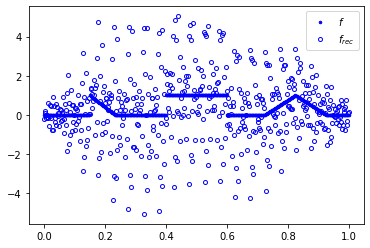

In [4]:
n = 500
z = 0.05;
eps = .00001;

t = np.array([(k+.5)/n for k in range(n)])
A = build_blur_A_hat(n,z);
f = f_function(t);

b = A@f;
e = eps*np.linalg.norm(b)*np.random.randn(n);
bnoise = b+e;

frec = np.linalg.solve(A,bnoise)
plt.plot(t,f,'.',color='blue',markersize=5,label='$f$')
plt.plot(t,frec,'.',markerfacecolor='none',color='blue',\
         markersize=8,label='$f_{rec}$')
plt.legend();

The next code block shows how to implement the regularization solve

1.732865513859493e-11


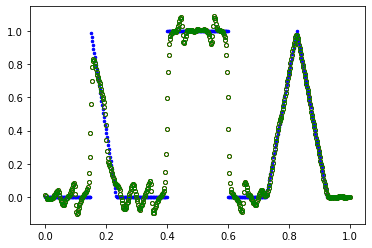

In [7]:
lam = 1e-2;
I   = np.identity(n)
flam = np.linalg.solve(A.T@A+(lam**2)*I,(A.T)@bnoise)
Alam = np.block([[A],[lam*I]])
blam = np.block([bnoise,np.zeros(n)])
flam2 = np.linalg.lstsq(Alam,blam,rcond=None)[0]

plt.plot(t,f,'.',color='blue',markersize=5)
plt.plot(t,flam,'.',markerfacecolor='none',color='red',markersize=8)
plt.plot(t,flam2,'.',markerfacecolor='none',color='green',markersize=8)

print(np.linalg.norm(flam-flam2))

Text(0, 0.5, '$||f_\\lambda||$')

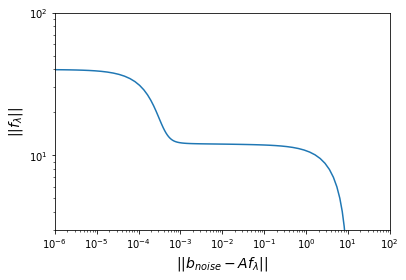

In [34]:
lamvec = np.logspace(-7,.5,100);                  # 100 (log-spaced) lambda values

fnorm = [];
rnorm = [];

I    = np.identity(n)
blam = np.block([bnoise,np.zeros(n)])

for lam in lamvec:
    Alam = np.block([[A],[lam*I]])
    flam = np.linalg.lstsq(Alam,blam,rcond=None)[0]
    fnorm.append(np.linalg.norm(flam))
    rnorm.append(np.linalg.norm(bnoise-A@flam))

plt.loglog(rnorm,fnorm,'-')
plt.xlim([1e-6, 1e2])
plt.ylim([3, 1e2])
plt.xlabel('$||b_{noise}-A f_\lambda||$',fontsize=14)
plt.ylabel('$||f_\lambda||$',fontsize=14)

Text(0, 0.5, '$||f_\\lambda||$')

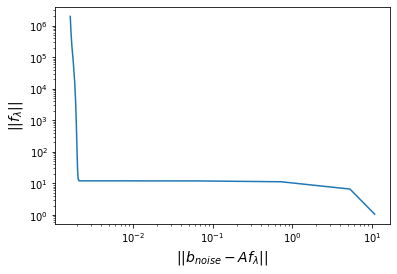

In [72]:
n = 500
z = 0.01;
eps = 1e-5;

t = np.array([(k+.5)/n for k in range(n)])
A = build_blur_A_gaussian(n,z);

f = f_function(t);

b = A@f;
e = eps*np.linalg.norm(b)*np.random.randn(n);
bnoise = b+e;

lamvec = np.logspace(-10,.5,20);                  # 100 (log-spaced) lambda values

fnorm = [];
rnorm = [];

I    = np.identity(n)
blam = np.block([bnoise,np.zeros(n)])

for lam in lamvec:
    Alam = np.block([[A],[lam*I]])
    flam = np.linalg.lstsq(Alam,blam,rcond=None)[0]
    fnorm.append(np.linalg.norm(flam))
    rnorm.append(np.linalg.norm(bnoise-A@flam))

plt.loglog(rnorm,fnorm,'-')
#plt.xlim([1e-6, 1e2])
#plt.ylim([3, 1e2])
plt.xlabel('$||b_{noise}-A f_\lambda||$',fontsize=14)
plt.ylabel('$||f_\lambda||$',fontsize=14)